/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


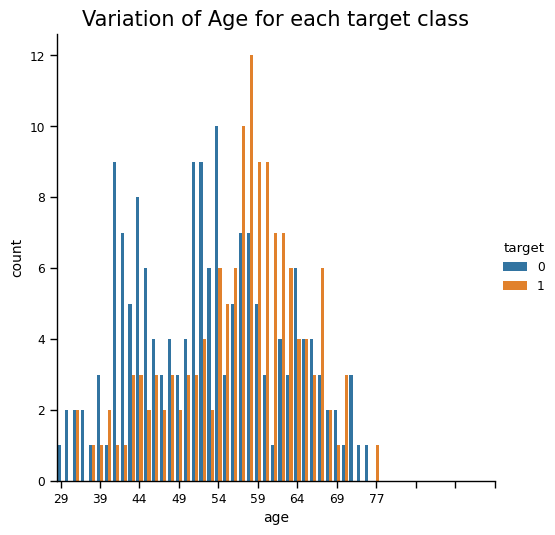

In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Bài tập 1
df = pd.read_csv('/kaggle/input/cleverland/cleveland.csv', header = None)
df.columns = ['age', 'sex', 'cp', 'trestbps', 'chol',
              'fbs', 'restecg', 'thalach', 'exang',
              'oldpeak', 'slope', 'ca', 'thal', 'target']
df['target'] = df.target.map({0: 0, 1: 1, 2: 1, 3: 1, 4: 1})
df['thal'] = df.thal.fillna(df.thal.mean())
df['ca'] = df.ca.fillna(df.ca.mean())

# distribution of target vs age
sns.set_context("paper", font_scale=1, rc={'font.size':3, 'axes.titlesize':15, 'axes.labelsize':10})
ax = sns.catplot(kind='count', data=df, x='age', hue='target', order=df['age'].sort_values().unique())

ax.ax.set_xticks(np.arange(0, 60, 5))
plt.title("Variation of Age for each target class")
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


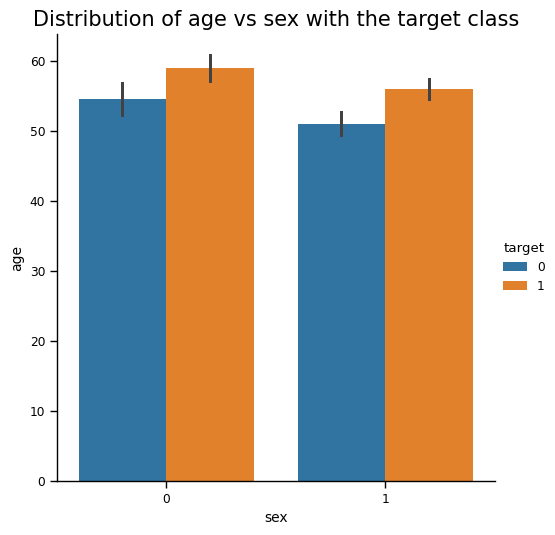

In [13]:
sns.catplot(kind='bar', data=df, y='age', x='sex', hue='target')
plt.title('Distribution of age vs sex with the target class')
plt.show()

In [14]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

from sklearn.preprocessing import StandardScaler as ss
sc = ss()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
#########################################   KNeighborsClassifier   #############################################################

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski')
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)

y_pred_train = classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for KNeighborsClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for KNeighborsClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for KNeighborsClassifier = 0.76
Accuracy for test set for KNeighborsClassifier = 0.69


In [19]:
#########################################   SVM   #############################################################

from sklearn.svm import SVC

svm_classifier = SVC(kernel='rbf',random_state=42)
svm_classifier.fit(X_train, y_train)

y_pred = svm_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)

y_pred_train = svm_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)
print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for SVC = {}'.format(accuracy_for_train))
print('Accuracy for test set for SVC = {}'.format(accuracy_for_test))



Accuracy for training set for SVC = 0.66
Accuracy for test set for SVC = 0.67


In [22]:
#########################################   Naive Bayes  #############################################################

from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train,y_train)

y_pred = nb_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)

y_pred_train = nb_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GaussianNB = {}'.format(accuracy_for_train))
print('Accuracy for test set for GaussianNB = {}'.format(accuracy_for_test))



Accuracy for training set for GaussianNB = 0.85
Accuracy for test set for GaussianNB = 0.84


In [25]:
#########################################   Decision Tree  #############################################################
from sklearn.tree import DecisionTreeClassifier

dt_classifier = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_split=2)
dt_classifier.fit(X_train,y_train)

y_pred = dt_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)

y_pred_train = dt_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)


print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for DecisionTreeClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for DecisionTreeClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for DecisionTreeClassifier = 1.0
Accuracy for test set for DecisionTreeClassifier = 0.74


In [34]:
#########################################  Random Forest  #############################################################
from sklearn.ensemble import RandomForestClassifier

rd_classifier = RandomForestClassifier(criterion='gini', max_depth=10, min_samples_split=2, n_estimators=10)
rd_classifier.fit(X_train, y_train)

y_pred = rd_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)

y_pred_train = rd_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for RandomForestClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for RandomForestClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for RandomForestClassifier = 0.99
Accuracy for test set for RandomForestClassifier = 0.87


In [42]:

###############################################################################
# applying Adaboost

from sklearn.ensemble import AdaBoostClassifier

ab_classifier = AdaBoostClassifier(n_estimators=50, learning_rate=1.0)
ab_classifier.fit(X_train, y_train)

y_pred = ab_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)

y_pred_train = ab_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for AdaBoostClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for AdaBoostClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for AdaBoostClassifier = 0.91
Accuracy for test set for AdaBoostClassifier = 0.84


In [37]:

###############################################################################
# Gradient Adaboost

from sklearn.ensemble import GradientBoostingClassifier

gb_classifier = GradientBoostingClassifier(learning_rate=0.1, n_estimators=100, subsample=1.0, min_samples_split=2, max_depth=3)
gb_classifier.fit(X_train, y_train)

y_pred = gb_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)

y_pred_train = gb_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for GradientBoostingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for GradientBoostingClassifier = {}'.format(accuracy_for_test))



Accuracy for training set for GradientBoostingClassifier = 1.0
Accuracy for test set for GradientBoostingClassifier = 0.85


In [40]:

###############################################################################
# applying XGBoost
from xgboost import XGBClassifier
xg = XGBClassifier(objective='binary:logistic', random_state=42, n_estimators=100)
xg.fit(X_train, y_train)

y_pred = xg.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)

y_pred_train = xg.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for XGBClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for XGBClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for XGBClassifier = 1.0
Accuracy for test set for XGBClassifier = 0.84


In [47]:

dtc =  DecisionTreeClassifier(random_state=42)
rfc = RandomForestClassifier(random_state=42)
knn =  KNeighborsClassifier()
xgb = XGBClassifier()
gc = GradientBoostingClassifier(random_state=42)
svc = SVC(kernel = 'rbf', random_state=42)
ad = AdaBoostClassifier(random_state=42)


clf = [('dtc', dtc), ('rfc', rfc), ('knn', knn), ('xgb', xgb), ('gc', gc), ('svc', svc), ('ad', ad)]
from sklearn.ensemble import StackingClassifier

xg = XGBClassifier()
st_classifier = StackingClassifier(estimators=clf, final_estimator=xg)
st_classifier.fit(X_train, y_train)

y_pred = st_classifier.predict(X_test)
from sklearn.metrics import confusion_matrix
cm_test = confusion_matrix(y_pred,y_test)

y_pred_train = st_classifier.predict(X_train)
cm_train = confusion_matrix(y_pred_train, y_train)

print()
accuracy_for_train = np.round((cm_train[0][0] + cm_train[1][1])/len(y_train),2)
accuracy_for_test = np.round((cm_test[0][0] + cm_test[1][1])/len(y_test),2)
print('Accuracy for training set for StackingClassifier = {}'.format(accuracy_for_train))
print('Accuracy for test set for StackingClassifier = {}'.format(accuracy_for_test))


Accuracy for training set for StackingClassifier = 0.95
Accuracy for test set for StackingClassifier = 0.92
